# Plotting and Visualization

In [1]:
# %load nbheader.py
%reload_ext autoreload
%autoreload 2

## A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os
import numpy as np
import pandas as pd
from datetime import datetime

### Figures and Subplots

In [39]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

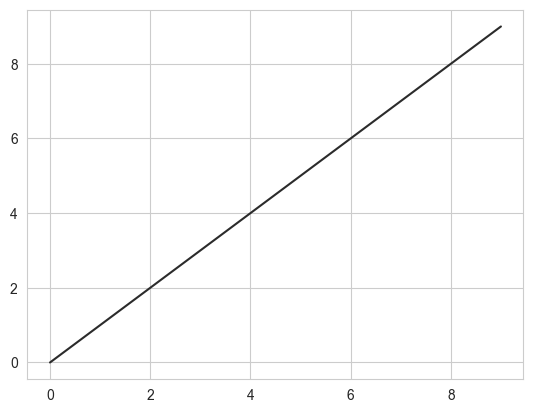

In [40]:
plt.plot(data)

In [41]:
# plt.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig1.png")

<Figure size 640x480 with 0 Axes>

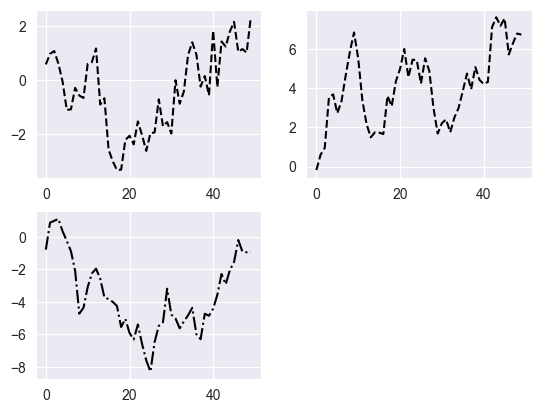

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(np.random.standard_normal(50).cumsum(), color="black",          
         linestyle="dashed")
ax2.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="--")
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="-.")

In [7]:
fig.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig2.png", dpi=400)

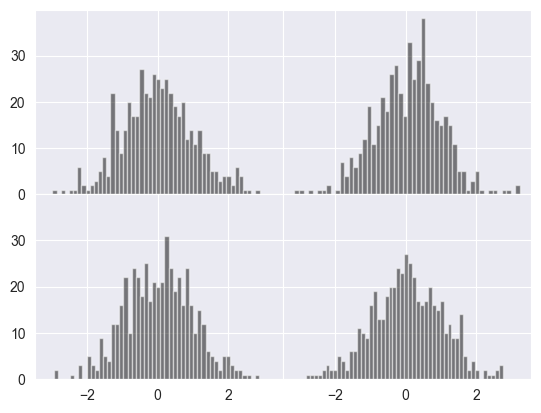

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

In [9]:
fig.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig3.png", dpi=400)

### Colors, Markers, and Line Styles

In [10]:
ax = fig.add_subplot()

ax.plot(np.random.standard_normal(30).cumsum(), color="black", 
        linestyle="dashed", marker="o");

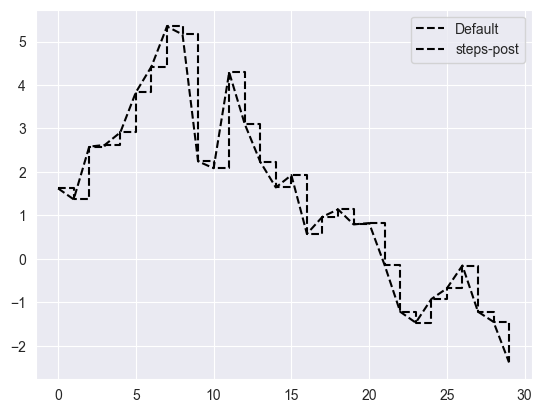

In [11]:
fig = plt.figure()

ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

In [12]:
fig.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig4.png", dpi=400)

### Ticks, Labels, and Legends

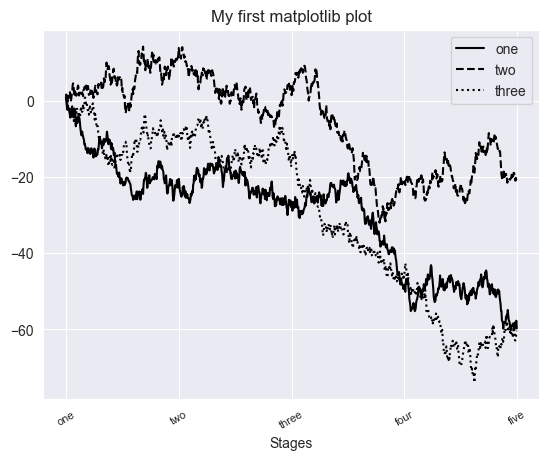

In [13]:
# Adding legends
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");

# Adding ticks, labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
# Adding a title
ax.set_title("My first matplotlib plot")
# ax.set(title="My first matplotlib plot", xlabel="Stages")

ax.legend()

In [14]:
fig.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig5.png", dpi=400)

### Annotations and Drawing on a Subplot

In [15]:
!pwd

/Users/markjack/GSU_Fall2024/IFI8410


Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

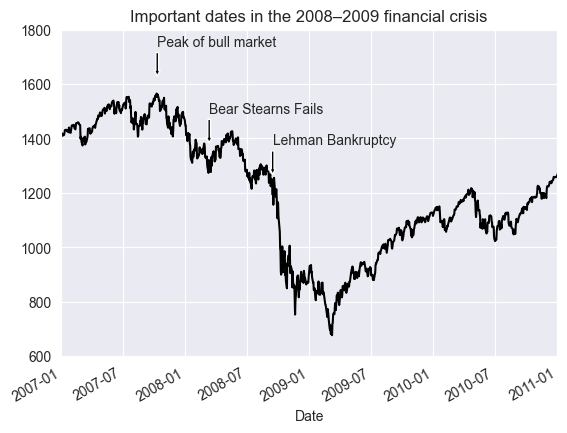

In [16]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("./DataScienceProgramming/06-Data-Transformation-Visualization/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

In [17]:
fig.savefig("./DataScienceProgramming/06-Data-Transformation-Visualization/fig6.png", dpi=400)

## 9.2 Plotting with pandas and seaborn

### Line Plots

<Axes: >

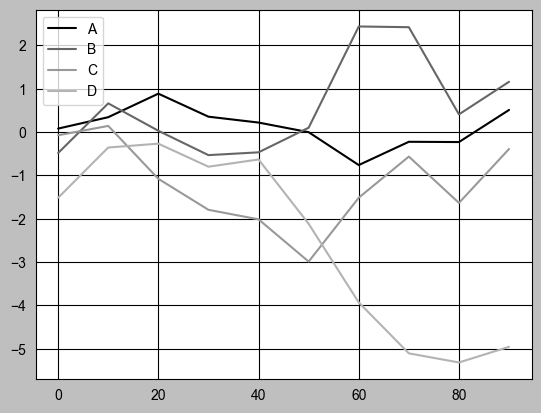

In [18]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

plt.style.use('grayscale')
df.plot()

### Bar Plots

In [19]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.863172,0.638532,0.441823,0.244719
two,0.232092,0.137926,0.475329,0.835782
three,0.191874,0.860044,0.228979,0.232876
four,0.342604,0.353843,0.447891,0.797434
five,0.185341,0.623966,0.096522,0.777421
six,0.701387,0.079425,0.240537,0.384301


<Axes: >

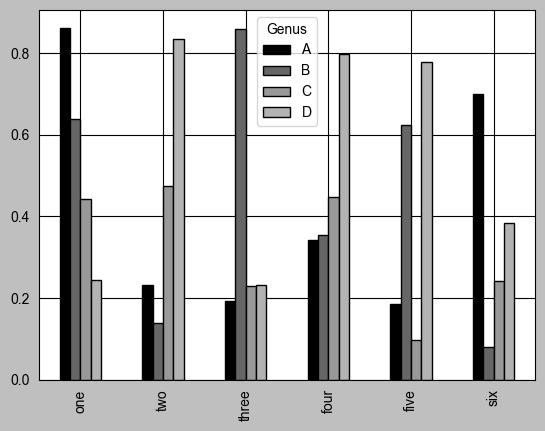

In [20]:
df.plot.bar()

<Axes: >

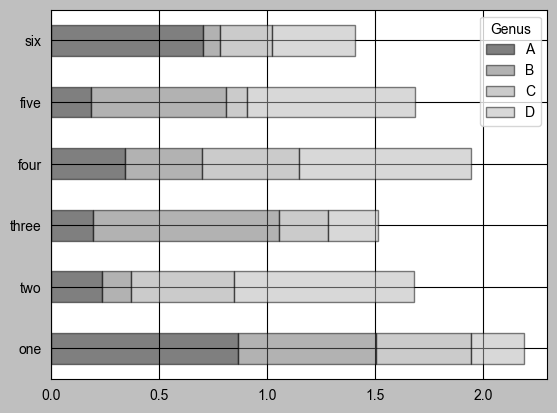

In [21]:
# Stacked horizontal bar plots with frequencies
df.plot.barh(stacked=True, alpha=0.5)

In [22]:
# Stacked vertical bar plots with percentages
tips = pd.read_csv("./DataScienceProgramming/06-Data-Transformation-Visualization/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [23]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [24]:
party_counts = party_counts.loc[:, 2:5]

In [25]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")

In [26]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

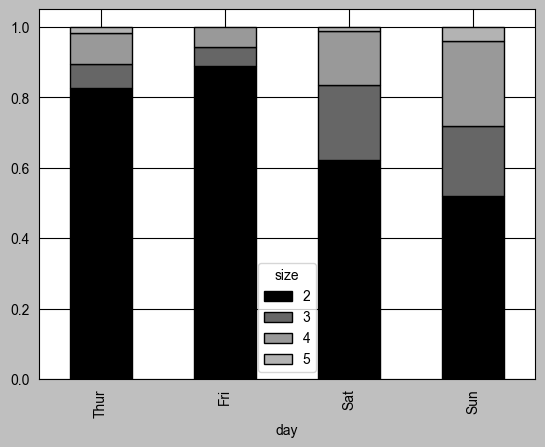

In [27]:
party_pcts.plot.bar(stacked=True)

In [28]:
# Use of seaborn package
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

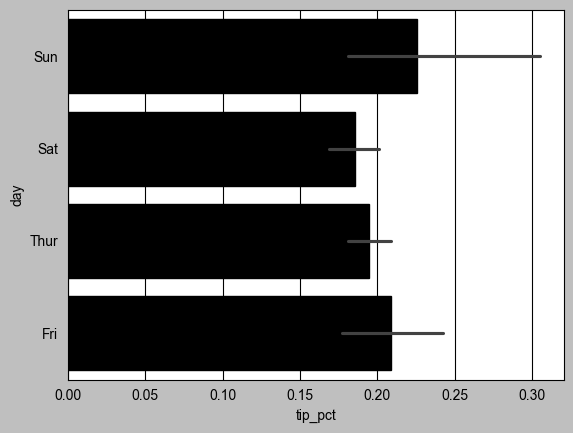

In [29]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

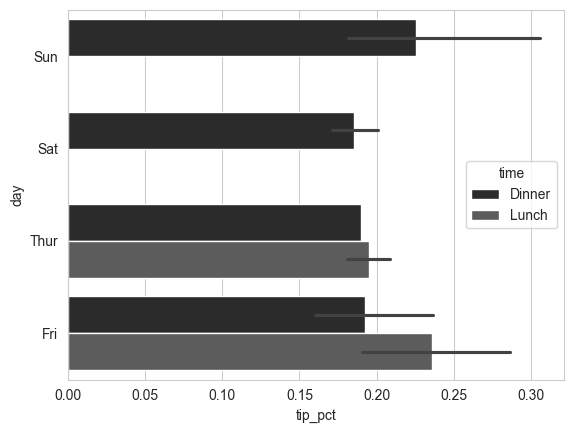

In [30]:
# Split on an additional category
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### Histograms and Density Plots

<Axes: ylabel='Count'>

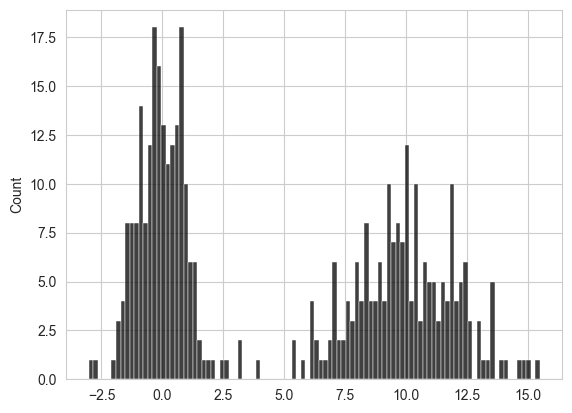

In [31]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")

### Scatter or Point Plots

In [32]:
macro = pd.read_csv("./DataScienceProgramming/06-Data-Transformation-Visualization/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

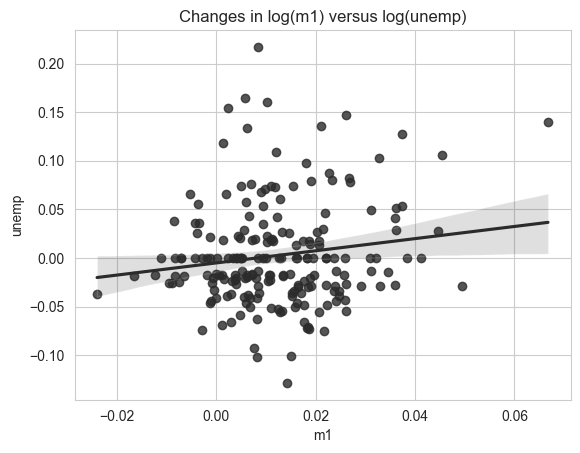

In [33]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

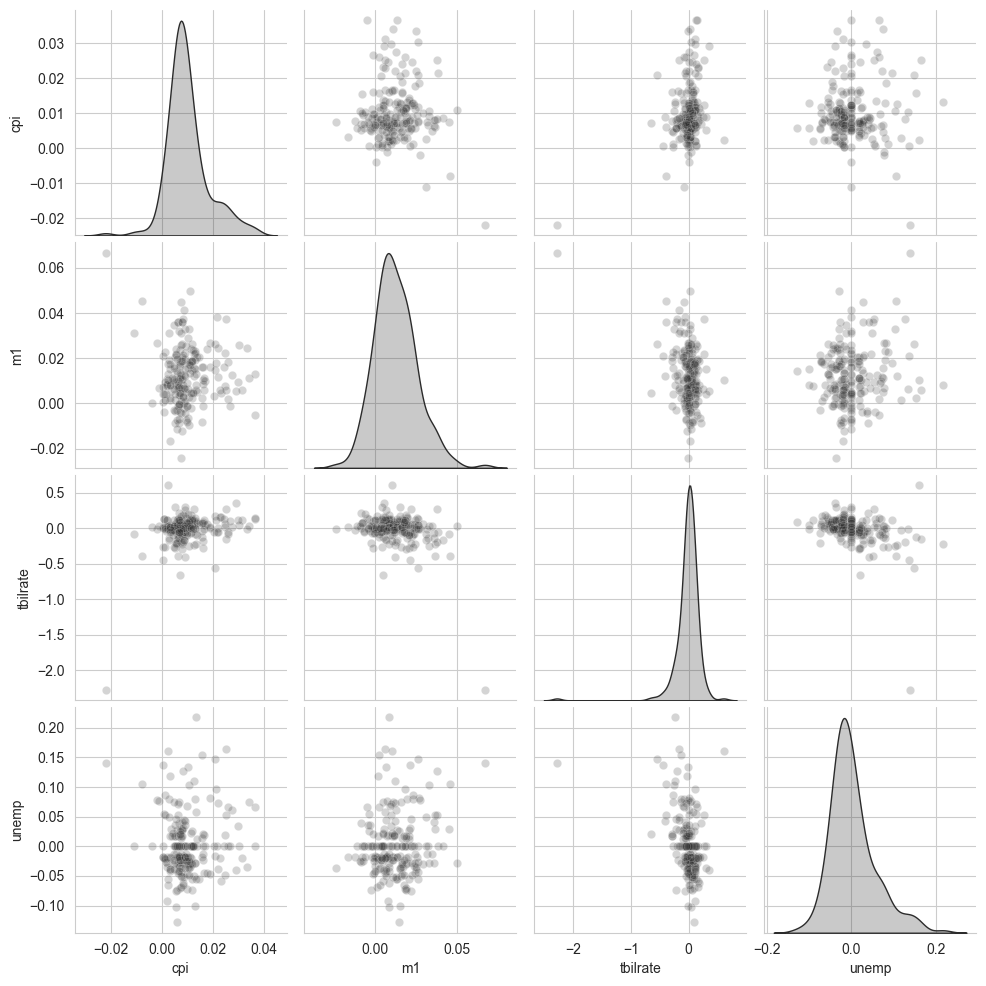

In [34]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### Facet Grids and Categorical Data

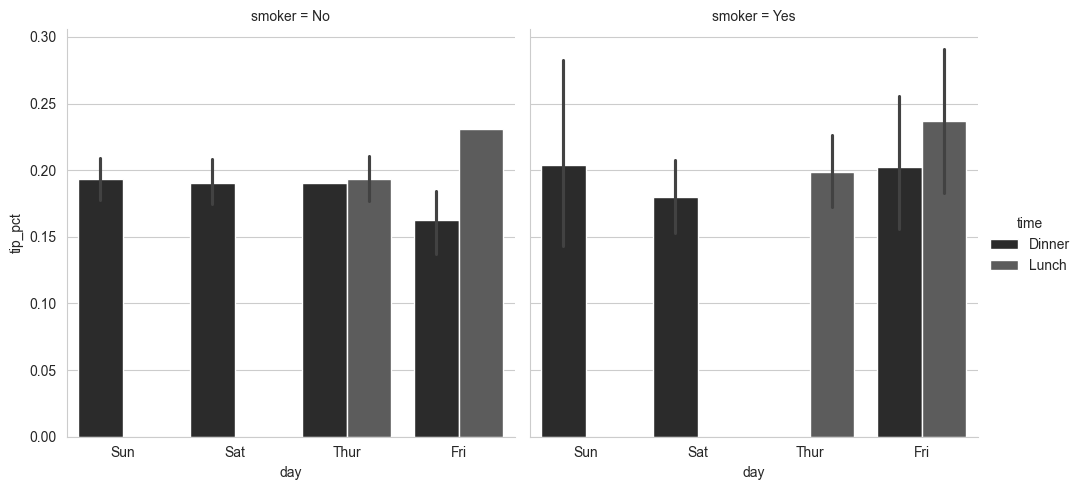

In [35]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

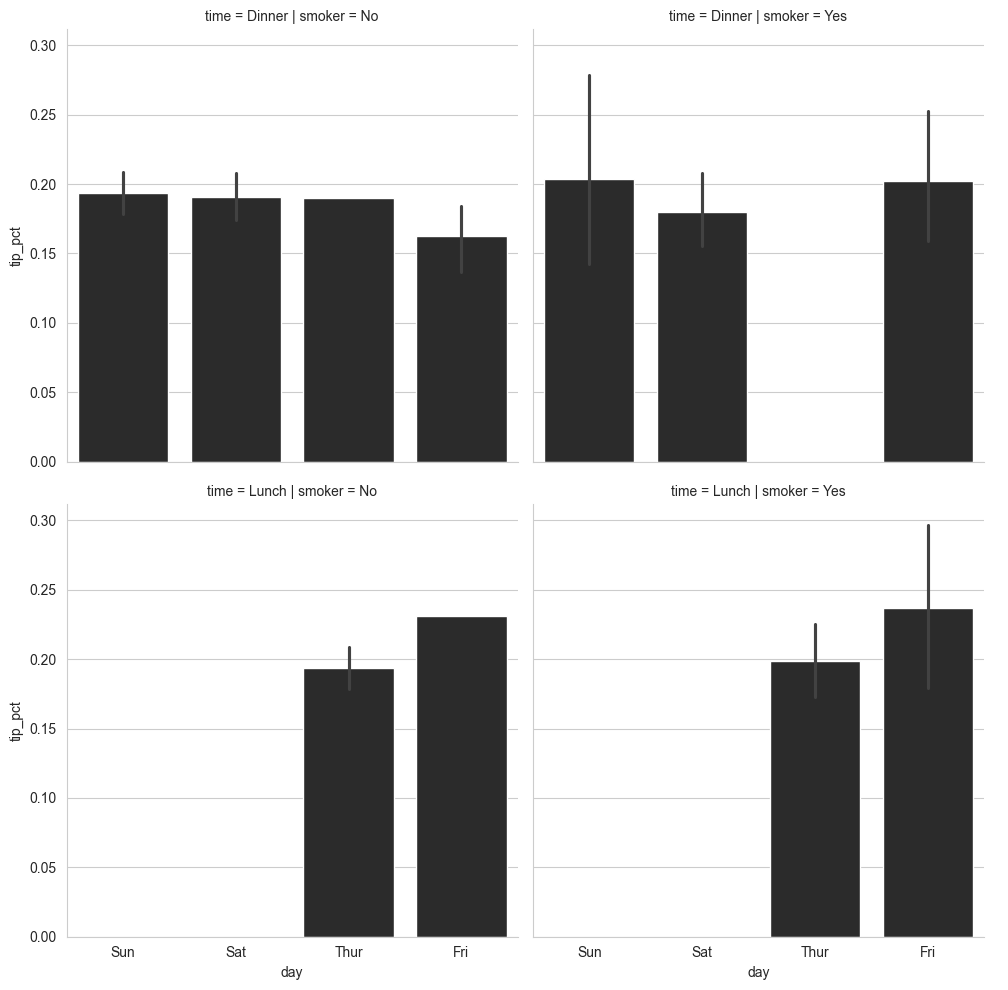

In [36]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

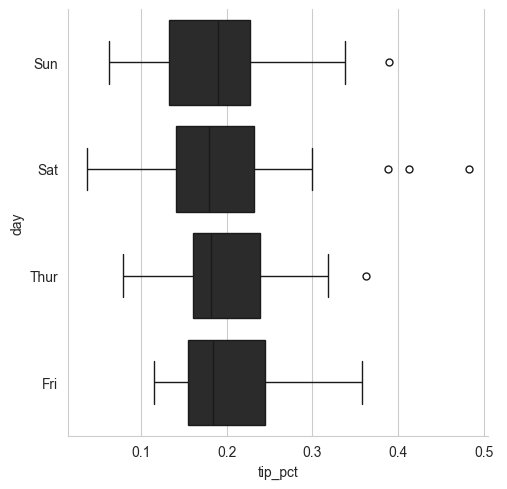

In [37]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])